In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read the Excel file into a DataFrame
df = pd.read_csv("data/Customer_Churn_Data_Large.csv")

# Display the first few rows of the DataFrame
print(df.head())

   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium



Numerical Summary of Age:
count    1000.000000
mean       43.267000
std        15.242311
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

Cross tabulation of Gender and MaritalStatus:
MaritalStatus  Divorced  Married  Single  Widowed
Gender                                           
F                   126      129     108      150
M                   122      132     107      126

Cross tabulation of MaritalStatus and IncomeLevel:
IncomeLevel    High  Low  Medium
MaritalStatus                   
Divorced         82   87      79
Married          98   86      77
Single           75   62      78
Widowed          94   90      92


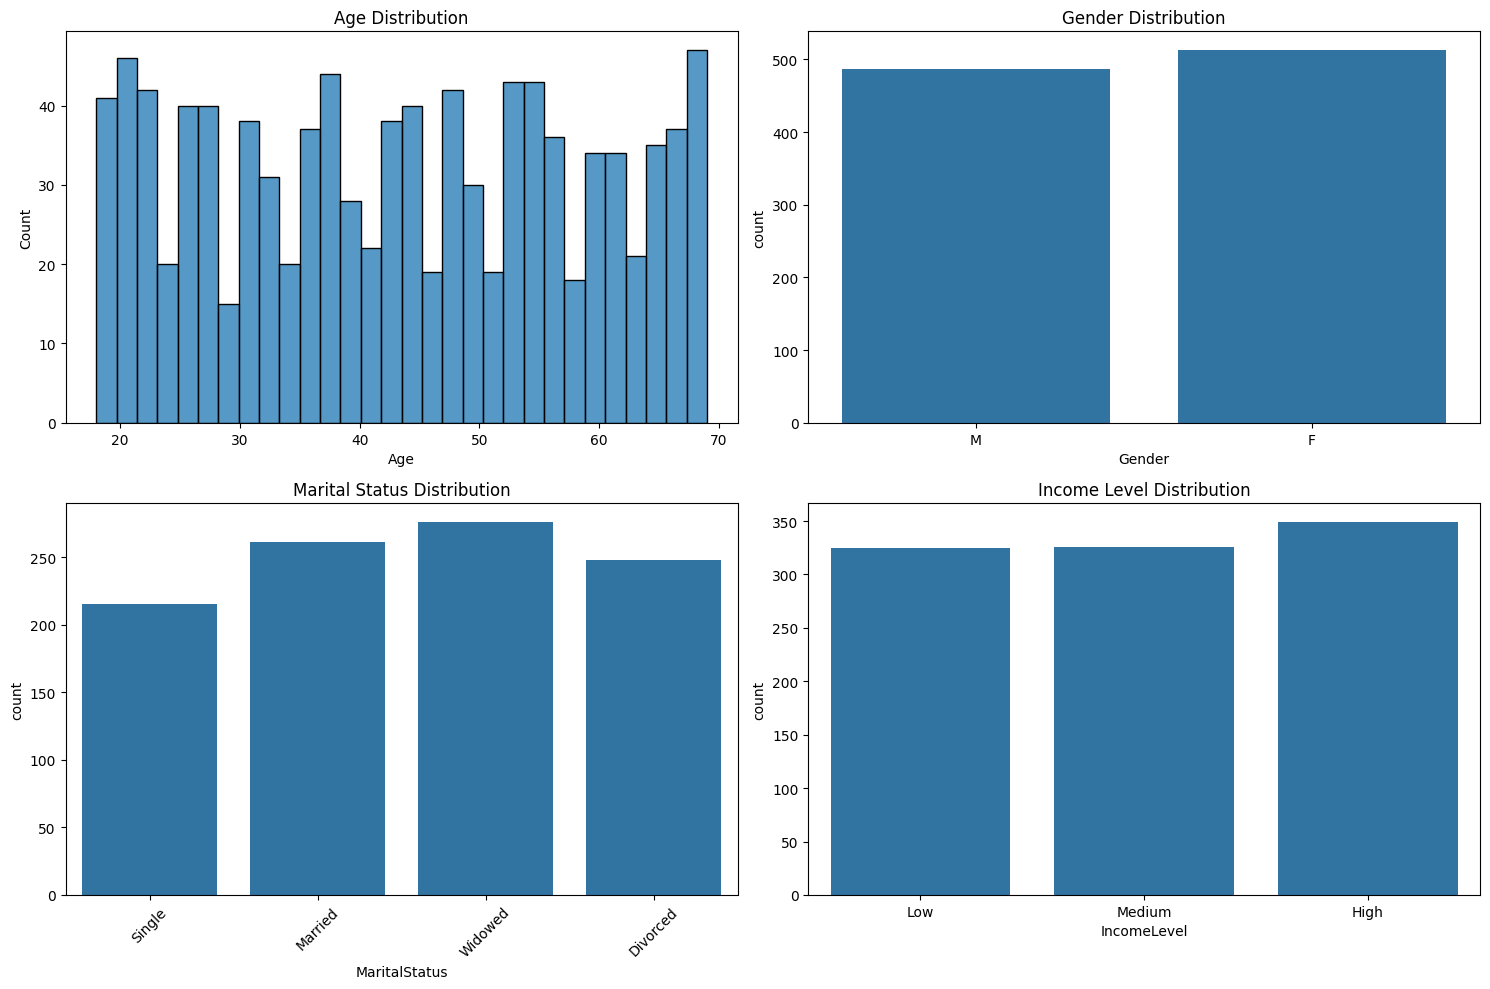

In [9]:
# Set style for better visualization
fig = plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

# Gender distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

# Marital Status distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='MaritalStatus')
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')

# Income Level distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='IncomeLevel')
plt.title('Income Level Distribution')

plt.tight_layout()

# Additional analysis
print("\nNumerical Summary of Age:")
print(df['Age'].describe())

print("\nCross tabulation of Gender and MaritalStatus:")
print(pd.crosstab(df['Gender'], df['MaritalStatus']))

print("\nCross tabulation of MaritalStatus and IncomeLevel:")
print(pd.crosstab(df['MaritalStatus'], df['IncomeLevel']))

Skewness of Age: 0.0132
The distribution is positively skewed (right-tailed)


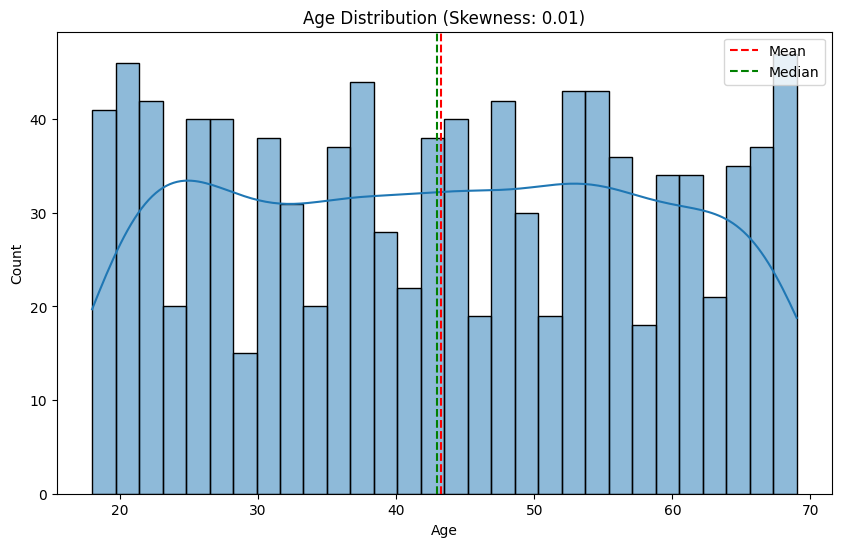

In [10]:
# Calculate skewness of Age
skewness = df['Age'].skew()

# Create a figure to show distribution with skewness information
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title(f'Age Distribution (Skewness: {skewness:.2f})')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Age'].median(), color='green', linestyle='--', label='Median')
plt.legend()

# Print numerical skewness information
print(f"Skewness of Age: {skewness:.4f}")
if skewness > 0:
    print("The distribution is positively skewed (right-tailed)")
elif skewness < 0:
    print("The distribution is negatively skewed (left-tailed)")
else:
    print("The distribution is approximately symmetric")


Outlier Statistics:
Q1: 30.00
Q3: 56.00
IQR: 26.00
Lower bound: -9.00
Upper bound: 95.00

Number of outliers: 0

Outlier details:
Empty DataFrame
Columns: [CustomerID, Age, Gender, MaritalStatus, IncomeLevel]
Index: []


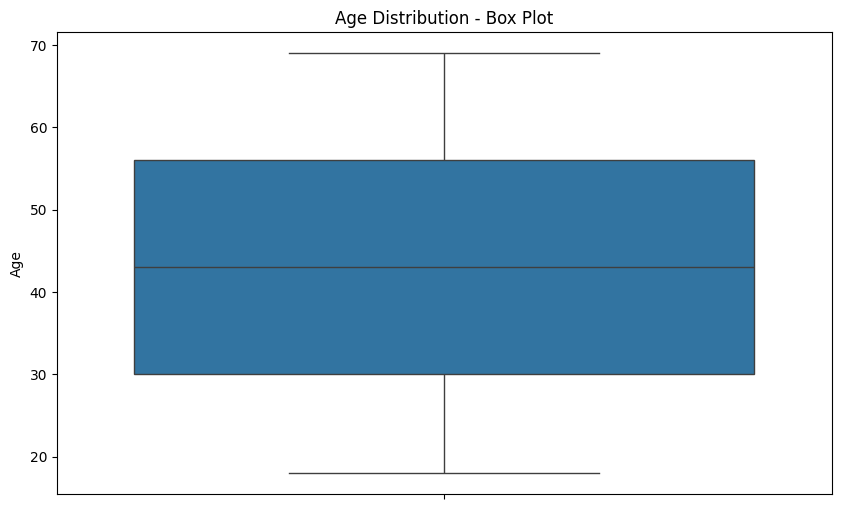

In [11]:
# Create a figure for box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age')
plt.title('Age Distribution - Box Plot')

# Calculate statistics for outlier detection
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("\nOutlier Statistics:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)}")
print("\nOutlier details:")
print(outliers[['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel']])

In [12]:
# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing Values Summary:
CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

Number of duplicate rows: 0
